<a href="https://colab.research.google.com/github/carpalmar/IA-FUNDAMENTALS/blob/main/4_simulated_annealing_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulated Annealing

# Plotting


Ejemplo de como visualizar los nodos

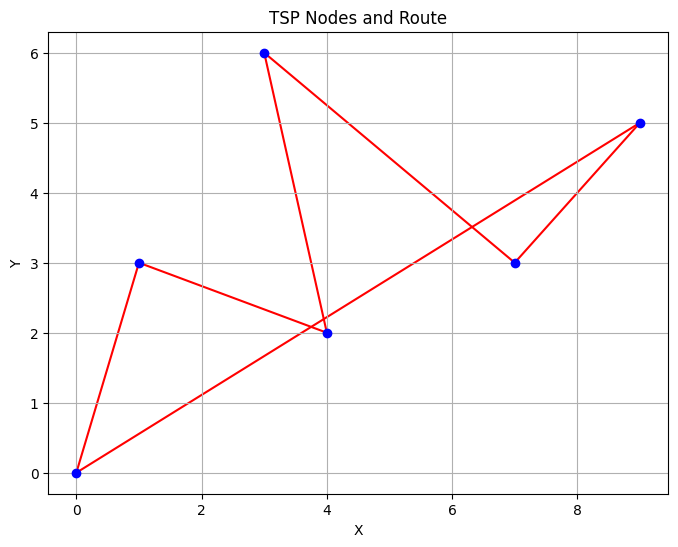

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Example usage:
nodes = [(0, 0), (1, 3), (4, 2), (3, 6), (7, 3), (9, 5)]  # Coordinates of nodes
route = [0, 1, 2, 3, 4, 5]  # Example TSP route (indices of nodes)

plot_tsp(nodes, route)

# Implementación

Generación de datos TSP y solución inicial

In [2]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

N = 20
positions = np.random.rand(N, 2)
distances = squareform(pdist(positions, 'euclidean'))
print(positions)
print(distances)


[[0.96736843 0.12915823]
 [0.4220149  0.34179282]
 [0.29449412 0.16698255]
 [0.52833196 0.22620191]
 [0.01596312 0.40552167]
 [0.83602678 0.16269379]
 [0.80958008 0.46340115]
 [0.2151652  0.96099937]
 [0.0570266  0.51934862]
 [0.82646475 0.66011223]
 [0.25459888 0.69893184]
 [0.83154256 0.4475474 ]
 [0.93825187 0.61559854]
 [0.0246465  0.71555947]
 [0.84728686 0.20775536]
 [0.22749112 0.40333562]
 [0.0188307  0.07967269]
 [0.77250404 0.72158655]
 [0.35573624 0.63509076]
 [0.4636839  0.21245266]]
[[0.         0.58534088 0.67393658 0.44963374 0.99073146 0.13555539
  0.36961534 1.12150318 0.9904397  0.54933232 0.91251433 0.34615073
  0.48731094 1.11022118 0.14351688 0.78904479 0.94982769 0.6236533
  0.79376424 0.51052529]
 [0.58534088 0.         0.2163797  0.15704959 0.4110224  0.45109012
  0.4061962  0.65284267 0.40588487 0.5146911  0.39443175 0.4229621
  0.58435451 0.54553017 0.44589492 0.204027   0.48089963 0.51680356
  0.30069344 0.13588665]
 [0.67393658 0.2163797  0.         0.241219

Algoritmo Simulated Annealing

In [3]:
def fitness(sol):
  distance = 0
  for i in range(len(sol)-1):
    distance += distances[sol[i]][sol[i+1]]
  return distance

def random_neighbor(sol):
  i, j = np.random.choice(len(sol), 2, replace=False) # two random indices
  new_sol = sol.copy()
  new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
  return new_sol

def accept(delta, T):
  if delta < 0:
    return True
  else: # damos la opcion de aceotar soluciones malas.
    r = np.random.rand() # random value between [0, 1]
    if r < np.exp(-delta/T):
      return True
    else:
      return False

def simulated_annealing(T_max, T_min, cooling_rate):
  T = T_max
  x = initial_solution.copy()
  E = fitness(x)

  print("temperatura:", T)
  print("x", x)
  print("E", E, "\n")


  while (T > T_min) :
    x_new = random_neighbor(x)
    E_new = fitness(x_new)
    delta = E_new - E
    #print("iteration, T:", T, " delta:", delta)
    if accept(delta, T):
      x = x_new
      E = E_new

    T = T*cooling_rate

  return x


[15  8  3 13  5 14  0  6  2 10 17 18  9 16  1  4 19 11  7 12]


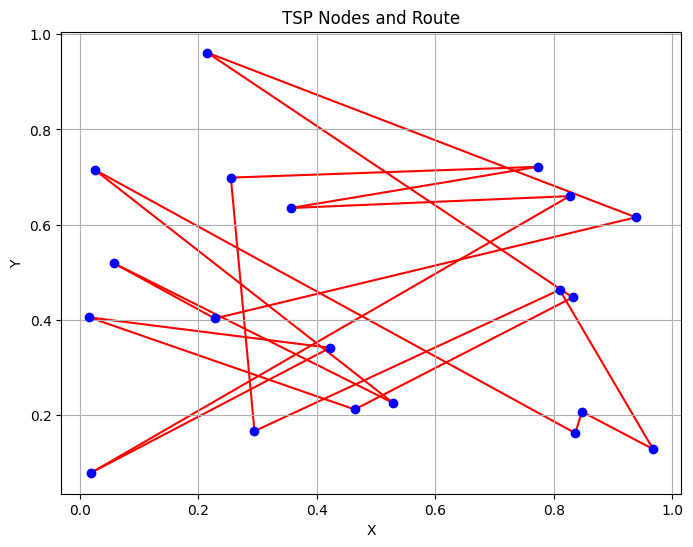

temperatura: 1000
x [15  8  3 13  5 14  0  6  2 10 17 18  9 16  1  4 19 11  7 12]
E 9.962282903379599 

[ 1 19  3  5  0 14 11  6 12  9 17 18 10 15  2 16  4  8 13  7]
3.7974025452154385


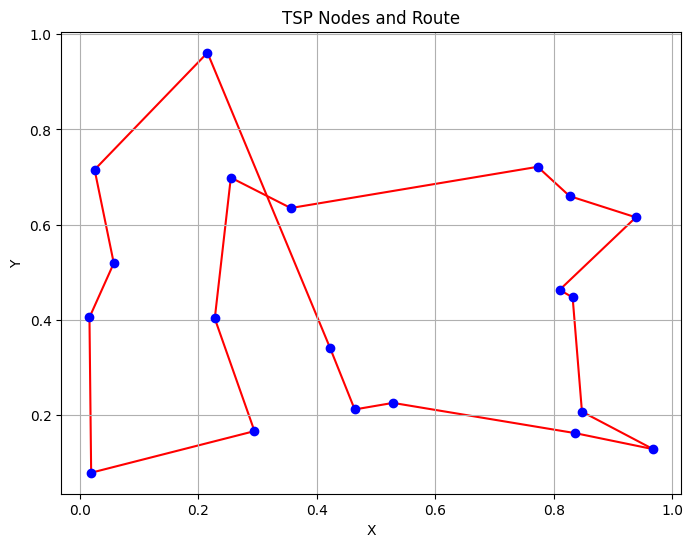

In [4]:
T_max = 1000
T_min = 0.000001
#T_min = 0.1
cooling_rate = 0.9999


# initial solution
initial_solution = np.array(list(range(N)))
np.random.shuffle(initial_solution)
print(initial_solution)
plot_tsp(positions, initial_solution)

# best solution
sol = simulated_annealing(T_max, T_min, cooling_rate)
print(sol)
print(fitness(sol))
plot_tsp(positions, sol)

# Simulated Annealing vs Hill Climbing

Hill Climbing

In [5]:
def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range(i + 1, len(sol)):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)

  return neighbors

def hill_climbing(sol):
  while True:
    #print("iteration:", sol)
    neighbors = get_neighbors(sol)
    best_neighbor = min(neighbors, key=fitness)

    if fitness(best_neighbor) < fitness(sol):
      sol = best_neighbor
    else:
      return sol


temperatura: 1000
x [ 6 12 15 14 13  3 16 19  7 11 17  0 18  1  8  9  2  4 10  5]
E 8.90550148358312 

Hill Climbing distance 3.888931043074927
Simulated Annealing distance 3.4919790476594397


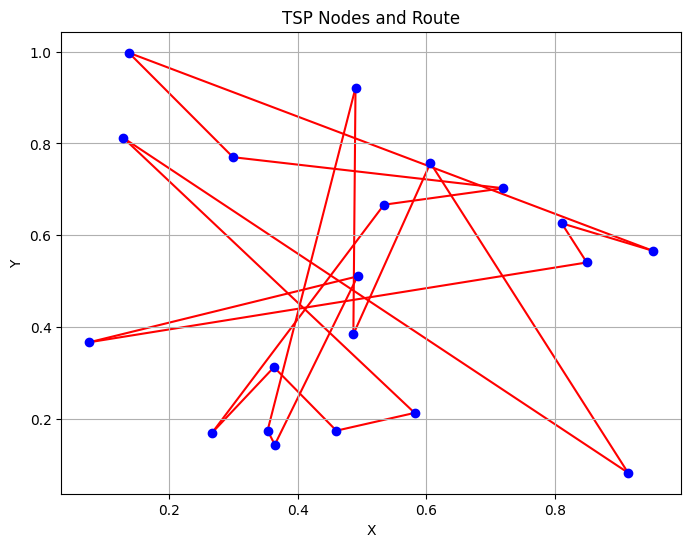

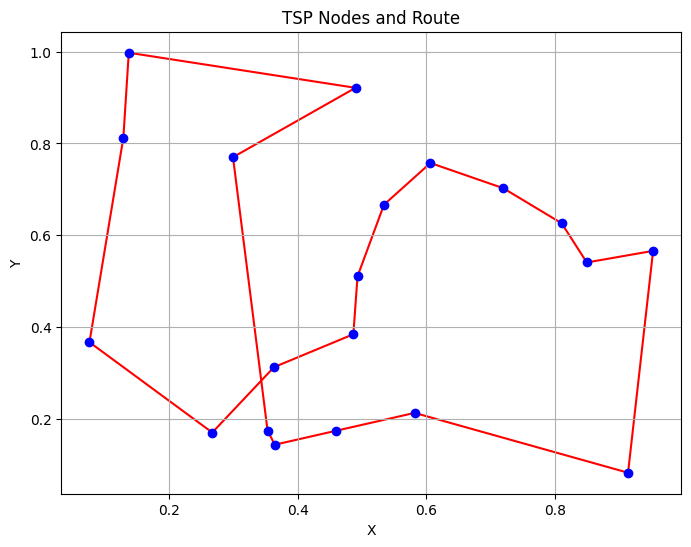

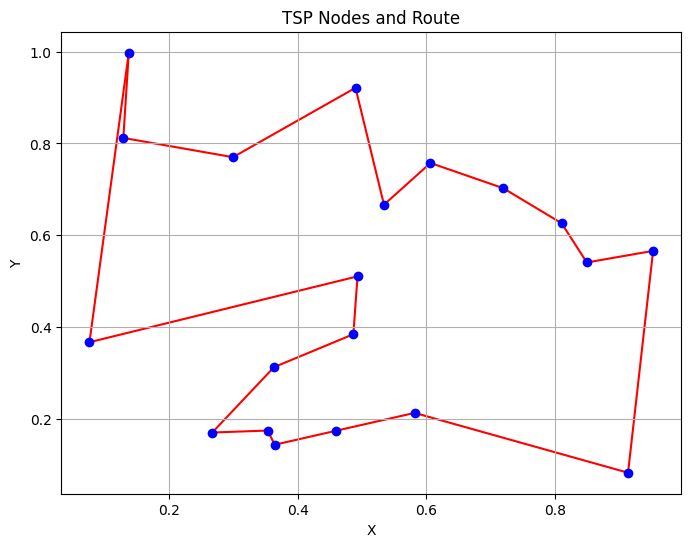

In [6]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

N = 20
positions = np.random.rand(N, 2)
distances = squareform(pdist(positions, 'euclidean'))

# initial solution
initial_solution = np.array(list(range(N)))
np.random.shuffle(initial_solution)

sol1 = hill_climbing(initial_solution)
sol2 = simulated_annealing(T_max, T_min, cooling_rate)

print("Hill Climbing distance", fitness(sol1))
print("Simulated Annealing distance", fitness(sol2))

plot_tsp(positions, initial_solution)
plot_tsp(positions, sol1)
plot_tsp(positions, sol2)